<center><h1>Optimisation et atterrissage automatique de fusées</h1></center>

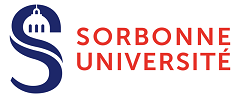

<center><h2>Licence 2 Physique - PAD</h2></center>

<center><h3>Jonathan Kianguebeni - Jîyan Akbay</h3></center>

<center><h4>Année universitaire 2021/2022</h4></center>

# Introduction

# I) Modèle

# II) Algorithme

# III) Résultats et discussion

# Conclusion